In [1]:
import collections

import pandas as pd
import tsam.timeseriesaggregation as tsam
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(
    "../storage_investment/storage_investment.csv",
    index_col=["timestep"]
)
data.index = pd.date_range("2022-01-01", periods=8760, freq="30min")

typical_periods = 12
hours_per_period = 24

aggregation1 = tsam.TimeSeriesAggregation(
    timeSeries=data,
    noTypicalPeriods=typical_periods,
    hoursPerPeriod=hours_per_period,
    clusterMethod="k_means",
    sortValues=False,
    rescaleClusterPeriods=False,
    extremePeriodMethod="replace_cluster_center",
    addPeakMax=["wind", "pv"],
    representationMethod="durationRepresentation",
)

aggregation1.createTypicalPeriods()


demand_el   pv      wind
   TimeStep                              
0  0         179980.733347  0.0  0.398512
   1         170332.330433  0.0  0.415168
   2         177246.999958  0.0  0.434723
   3         182943.792267  0.0  0.381379
   4         196807.746490  0.0  0.364956
...                    ...  ...       ...
11 43        323666.494918  0.0  0.295475
   44        283478.277566  0.0  0.377537
   45        270892.200194  0.0  0.350480
   46        262675.327043  0.0  0.329906
   47        252700.387652  0.0  0.247323

[576 rows x 3 columns]

In [6]:
print(aggregation1.segmentation)

False


In [28]:
occurences = collections.Counter(aggregation1.clusterOrder)
print(aggregation1.hoursPerPeriod / aggregation1.resolution)

48.0


In [26]:
print(aggregation1.clusterOrder)

[11  6  6  6  6  6  3  4  8  6  8 11  3  7  4  6  8  4  9  4  3  6 11  7
  4 10  3  7  4  1  4  4 10  3  1  2  1  6  3 10  3  7 10  9  5 10 10  1
  3  5  0  7  4  9  4  0 10  5  5  7  9  7  1  5  5  7 10  9  0  5 10 10
  5 10  9  0  5  5  1  0  4 10  0  1  0  0  0  7  9  0  7  9  5  7  7 10
  0  0  9  1  6  5  9  7  7  1  9 10  5 10  5  5  9  9  0  7  9  4  2  9
  0  5  0 10  0  0  9  0  3  3  9  0  0  7  1  1  4  9  5  4  7 10  7  4
 11  8  2  3 11  2  3 11 11  8  2  2  2  8  9  2  3  4  7  4  8  7  4  6
  8  4  4  7  4  4  6  2  8  4 11 10  8 11 11]


In [15]:
data2 = aggregation1.predictOriginalData()

AttributeError: 'DataFrame' object has no attribute 'segmentDurationDict'

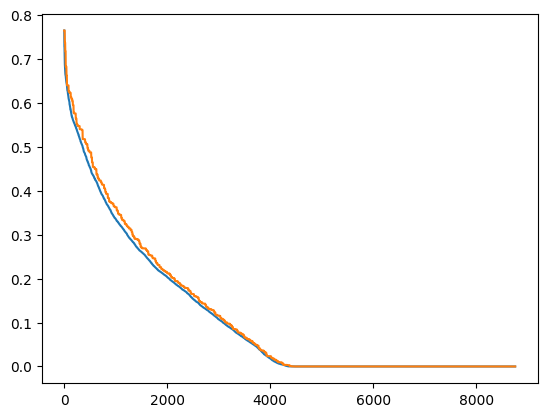

In [17]:
plt.plot(sorted(data["pv"])[::-1])
plt.plot(sorted(data2["pv"])[::-1])
plt.show()         